In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
scaled_input_path = "D:/temp_files/datasets/customer_segmentation/freshman.xlsx"
raw_intput_path = "D:/temp_files/datasets/customer_segmentation/raw_freshman.xlsx"
scaled_data = pd.read_excel(scaled_input_path)
raw_data = pd.read_excel(raw_intput_path)
scaled_data.drop(labels="CustomerID", axis=1, inplace=True)
raw_data.drop(labels="CustomerID", axis=1, inplace=True)
n_clusters = 3

1. 应用kmeans，并且评估聚类的惯性和轮廓系数

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# 42 出自 《银河系漫游指南》，宇宙的终极答案是42
kmeans_per_k = [KMeans(n_clusters=k, n_init=100).fit(scaled_data) for k in range(2,11)]
inertia = [model.inertia_ for model in kmeans_per_k]
silhouette_scores = [silhouette_score(scaled_data, model.labels_) for model in kmeans_per_k]

<AxesSubplot: title={'center': 'relationship betwwen inertia and k'}, xlabel='k', ylabel='inertia'>

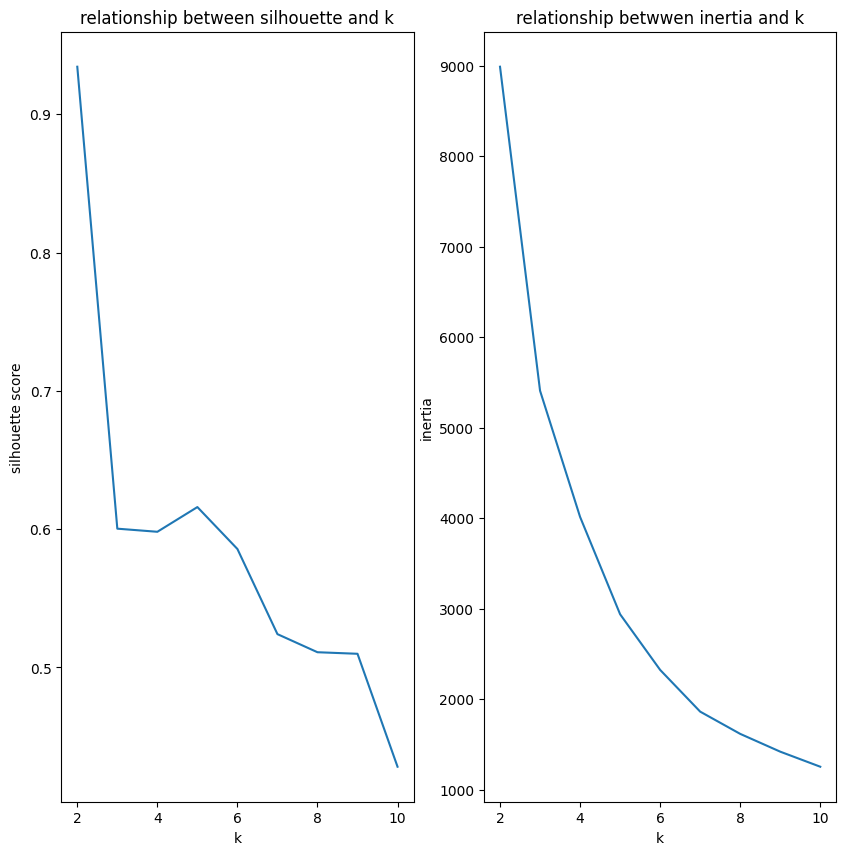

In [3]:
plt.figure(figsize=(10,10))
k_arr = range(2, 11)
plt.subplot(121)
plt.title('relationship between silhouette and k')
# plt.xlim(0,10)
plt.xlabel('k')
# plt.ylim(-1,1)
plt.ylabel('silhouette score')
sns.lineplot(y=silhouette_scores, x=k_arr)
plt.subplot(122)
plt.title('relationship betwwen inertia and k')
# plt.xlim(0,10)
plt.xlabel('k')
# plt.ylim(1800,13000)
plt.ylabel('inertia')
sns.lineplot(y=inertia, x=k_arr)

观察到，k=5时轮廓系数有明显回弹，故选择5为最佳聚类数

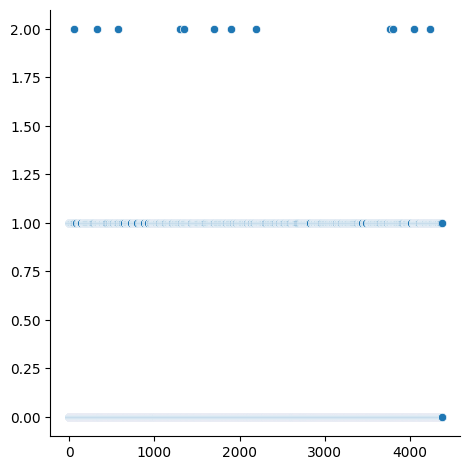

In [4]:
best_kmeans_model = KMeans(n_clusters=n_clusters, n_init=100).fit(scaled_data)
# labels_返回模型对象对所有实例的预测类别
data_labels = best_kmeans_model.labels_ # type: np.ndarray
sns.relplot(data=data_labels)
data_labels = pd.DataFrame(data=data_labels, columns=["label"], index=scaled_data.index)

画出各类客户依据RFM模型的表现

In [5]:
# 拼接成一个DataFrame，类型解释后续再说
data_res = pd.concat([scaled_data, data_labels], axis=1)
data_raw_res = pd.concat([raw_data, data_labels], axis=1)
# 查看每类有多少个人
data_res.label.value_counts()

0    3264
1    1096
2      12
Name: label, dtype: int64

In [6]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
temp = s.fit_transform(data_res)
temp = pd.DataFrame(temp, columns=data_res.columns)
temp.label = data_res.label

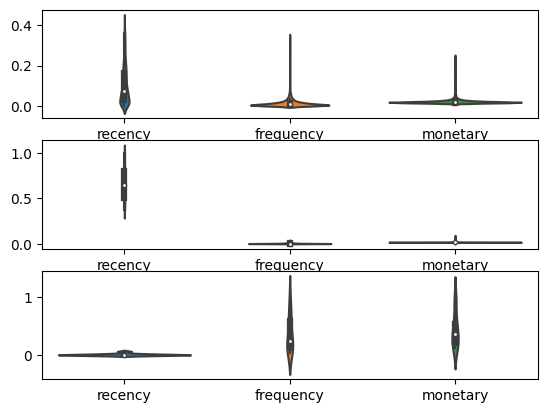

In [7]:

for i in range(n_clusters):
    idx_list:np.ndarray = np.where(temp['label'] == i)[0]
    plt.subplot(n_clusters, 1, i+1)
    sns.violinplot(data=temp.loc[idx_list, ['recency', 'frequency', 'monetary']])